# <center>RGBIF<center>
## <center>working with GBIF occurrence data in R<center>

## <center>What is GBIF?<center>

## <center>What is RGBIF?<center>
RGBIF is a **R wrapper** around the [GBIF API](https://www.gbif.org/developer/summary "GBIF API") to allow you to talk to GBIF from R.

## <center>RGBIF installation and loading libraries<center>

### <center>Installation<center>
We can install RGBIF directly from CRAN as any other R package:
```r
install.packages("rgbif")
```

### <center>Load libraries<center>

In [17]:
# Tidyverse packages
library(dplyr)
library(magrittr)
library(purrr)
library(tidyr)



In [18]:
# Graphic packages
library(ggplot2)
library(sp)
library(ggmap)
library(rgdal)
library(leaflet)
library(IRdisplay)

In [16]:

# RGBIF package
library(rgbif)

## <center>Download GBIF occurrences: `occ_data`<center>

* download GBIF occurrence data *on the fly*
* a simplified version of `occ_search` for speed improvement

### <center>Download GBIF occurrences: `occ_data`<center>

* search species occurrences by 
    * scientific name (`scientificName` or `taxonKey` from the GBIF backbone),
    * geographical areas (`country`, `continent`, `decimalLatitude` `decimalLongitude`, ...), 
    * temporal windows (`year`, `month`, ...),
    * datasets, `datasetKey`

Check [RGBIF documentation](https://cran.r-project.org/web/packages/rgbif/rgbif.pdf "RGBIF") for the full list of options.


In this tutorial we search occurrences data of: 
* *Vanessa atalanta Linnaeus, 1758*, a butterfly, best known as red admiral. 
![Vanessa Atalanta](http://www.virtualmuseum.ca/media/edu/EN/uploads/image/da1158216.jpg)

In [19]:
species <- "Vanessa atalanta Linnaeus, 1758"

* during 2016

In [20]:
year <- 2016

* in Belgium

In [21]:
country <- "BE"

In [55]:
occurrences <- rgbif::occ_data(
                     scientificName = species, 
                     country =  country, 
                     year = year,
                     limit = 200000)
head(occurrences)

name,key,decimalLatitude,decimalLongitude,issues,datasetKey,publishingOrgKey,publishingCountry,protocol,lastCrawled,⋯,identifiedBy,sex,catalogNumber,collectionCode,dateIdentified,verbatimLocality,http://unknown.org/occurrenceDetails,rights,eventTime,identificationID
Vanessa atalanta,1499553958,51.19077,4.75303,,1f968e89-ca96-4065-91a5-4858e736b5aa,4d3ceea8-5699-439d-a899-decac9cbbdac,BE,DWC_ARCHIVE,2017-09-30T14:26:42.352+0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Vanessa atalanta,1499572548,50.97084,4.38865,,1f968e89-ca96-4065-91a5-4858e736b5aa,4d3ceea8-5699-439d-a899-decac9cbbdac,BE,DWC_ARCHIVE,2017-09-30T14:26:54.096+0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Vanessa atalanta,1499565501,51.24053,4.39675,,1f968e89-ca96-4065-91a5-4858e736b5aa,4d3ceea8-5699-439d-a899-decac9cbbdac,BE,DWC_ARCHIVE,2017-09-30T14:26:49.427+0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Vanessa atalanta,1499558447,51.18613,5.03905,,1f968e89-ca96-4065-91a5-4858e736b5aa,4d3ceea8-5699-439d-a899-decac9cbbdac,BE,DWC_ARCHIVE,2017-09-30T14:26:45.526+0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Vanessa atalanta,1499580620,51.05133,5.03313,,1f968e89-ca96-4065-91a5-4858e736b5aa,4d3ceea8-5699-439d-a899-decac9cbbdac,BE,DWC_ARCHIVE,2017-09-30T14:26:59.173+0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Vanessa atalanta,1499572045,51.02209,3.67726,,1f968e89-ca96-4065-91a5-4858e736b5aa,4d3ceea8-5699-439d-a899-decac9cbbdac,BE,DWC_ARCHIVE,2017-09-30T14:26:53.611+0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Vanessa atalanta,1499577196,51.14976,4.46550,,1f968e89-ca96-4065-91a5-4858e736b5aa,4d3ceea8-5699-439d-a899-decac9cbbdac,BE,DWC_ARCHIVE,2017-09-30T14:26:56.957+0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Vanessa atalanta,1499560383,51.15802,3.46475,,1f968e89-ca96-4065-91a5-4858e736b5aa,4d3ceea8-5699-439d-a899-decac9cbbdac,BE,DWC_ARCHIVE,2017-09-30T14:26:46.573+0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Vanessa atalanta,1499556274,51.41943,4.47411,,1f968e89-ca96-4065-91a5-4858e736b5aa,4d3ceea8-5699-439d-a899-decac9cbbdac,BE,DWC_ARCHIVE,2017-09-30T14:26:43.809+0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Vanessa atalanta,1499553992,51.05133,5.03313,,1f968e89-ca96-4065-91a5-4858e736b5aa,4d3ceea8-5699-439d-a899-decac9cbbdac,BE,DWC_ARCHIVE,2017-09-30T14:26:42.416+0000,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


The interesting part is the `data` itself:

In [51]:
occ_Vanessa_BE <- occurrences$data

# <center>Temporal occurrence distribution<center>
Retrieving the monthly occurrence distribution:

In [52]:
counts_per_month <- count(occ_Vanessa_BE, month)
gg_month <- ggplot(counts_per_month, aes(y = n, x = month)) +
   geom_bar(stat="identity", fill = "#0072B2") +
   scale_x_continuous(breaks=seq(1,12,1), 
                      labels = c("Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                                 "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"))

In [53]:
options(repr.plot.width=4, repr.plot.height=3)

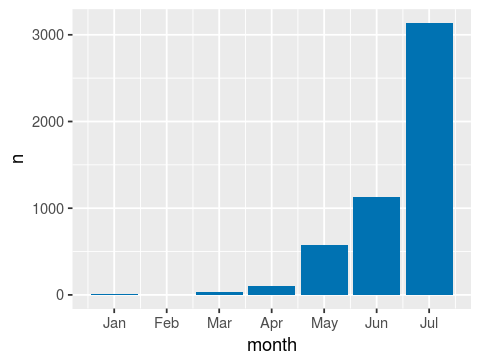

In [54]:
gg_month

# <center>Geographical occurrence distribution<center>

## <center>`gbifmap`<center>
Plot function in RGBIF: *`gbifmap`*

In [48]:
options(repr.plot.width=6, repr.plot.height=4)

Rendering map...plotting 1999 points


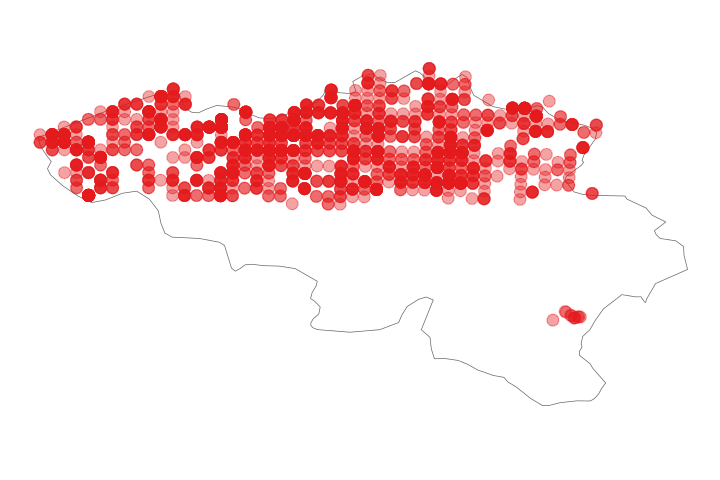

In [49]:
rgbif::gbifmap(input = occ_Vanessa_BE, mapdatabase = "world", region = "Belgium")

Quite basic output. Perfectly for quick screening, but we should get this cleaner...

### <center>Occurrence geographical distribution based on UTM-10 grid</center>

Let's start from the UTM-10 grid for Belgium, i.e. a grid covering all Belgium by means of squares with a side length of 10 km. And **count** the number of occurrences for each grid cell.

<center>![UTM](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Utm-zones.jpg/300px-Utm-zones.jpg)</center>

Quickly screen the UTM-10 grid for Belgium: 

OGR data source with driver: GeoJSON 
Source: "../data/input/EUgrid10.geojson", layer: "EUgrid10"
with 377 features
It has 3 fields


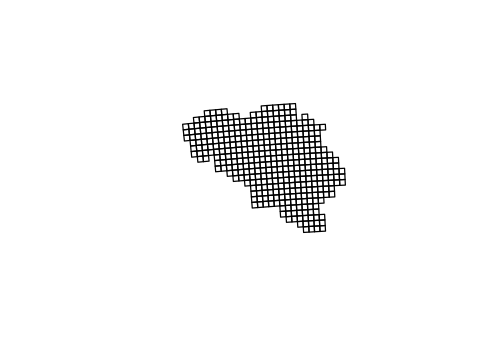

In [59]:
eu_10grid <-  readOGR("../data/input/EUgrid10.geojson")
plot(eu_10grid)

Transform `occ_Vanessa_BE` dataframe to a `SpatialPointsDataFrame`, a data structure wich combines coordinates, `@coords` and data, `@data`. 

GBIF occurrence data are saved using WGS84(EPSG: 4326), a very popular *Coordinate Reference System* (CRS) for latitude-longitude coordinates. A nice overview of CRSs in R is available [here](https://www.nceas.ucsb.edu/~frazier/RSpatialGuides/OverviewCoordinateReferenceSystems.pdf "Overview Coordinate Reference Systems").

In [19]:
wgs_84 <- CRS("+init=epsg:4326") # CRS used by GBIF
occ_points_Vanessa_BE <- SpatialPointsDataFrame(
    coords = occ_Vanessa_BE %>% select(decimalLongitude, decimalLatitude),
    data = occ_Vanessa_BE, 
    proj4string = wgs_84)

We need first to assign the CRS to `eu_10grid` (no conversion from other CRS needed):

In [51]:
proj4string(eu_10grid)
proj4string(eu_10grid) <- wgs_84
proj4string(eu_10grid)

[1] "+init=epsg:4326 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0"

[1] "+init=epsg:4326 +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0"

#### <center>How to count the number of occurrence records contained in each square?<center>
overlay the occurrence points, `occ_points`, and the grid, `eu_10grid`:
* function `over` from package `sp`

In [21]:
pts_square_Vanessa_BE <- over(eu_10grid, occ_points_Vanessa_BE, returnList = TRUE)


And then counting how many rows in each square (= dataframe)

In [22]:
n_of_pts_square_Vanessa_BE <- purrr:::map(pts_square_Vanessa_BE, ~ nrow(.))
n_of_pts_square_Vanessa_BE <- data.frame(id = names(n_of_pts_square_Vanessa_BE), 
                              value = unlist(n_of_pts_square_Vanessa_BE))
head(n_of_pts_square_Vanessa_BE)

,id,value
0,0,0
1,1,26
2,2,0
3,3,0
4,4,8
5,5,13


### <center>From static maps to dynamic maps: `leaflet`<center>
* one of the most popular open-source JavaScript libraries for interactive maps
* has the advantage to work with `Spatial***DataFrame`

add number of occurrence in each square to the grid:

In [29]:
eu_10grid@data <- bind_cols(eu_10grid@data, n_of_pts_square_Vanessa_BE)
eu_10_grid_subset <- subset(eu_10grid, value != 0) # select squares with no occurrences

and then adding it by `addPolygons`:

```r
pal <- colorNumeric("viridis", domain = NULL)
n_occ_grid_Vanessa_BE_leaflet <- leaflet() %>% 
  addTiles()  %>% 
  addPolygons(data = eu_10_grid_subset,
              stroke = FALSE, 
              fillColor = ~pal(value),
              fillOpacity = 0.7,
              smoothFactor = 0.1,
              label = ~paste(value,species, sep = ": ")) %>%
  addLegend(pal = pal, 
            values = eu_10_grid_subset$value, 
            opacity = 1.0,
            title = "OCCURRENCES")
```

Saving the map as HTML file
```r
library(htmlwidgets)
saveWidget(widget = n_occ_grid_Vanessa_BE_leaflet,
           file = "EUgrid10_occ_Vanessa_BE_2016.html")
file.rename(from = "./EUgrid10_occ_Vanessa_BE_2016.html", 
            to = "../data/output/EUgrid10_occ_Vanessa_BE_2016.html")
```

In [1]:
IRdisplay::display_html('<iframe src="../data/output/EUgrid10_occ_Vanessa_BE_2016.html" width=1000, height=500></iframe> ')

## <center>More data to download?<center>
* `occ_data` has a hard limit of 200000!
* use asynchronuous download function: `occ_download`

But that's another story...

* Do you want to know more about `occ_download` and in general about the potential of using GBIF in R?  
* Would you like to produce maps like this one?

In [3]:
IRdisplay::display_html('<iframe src="../extdata/EUgrid10_occ_Vanessa&Phylloscopus_SE_2016.html" width=1000, height=450></iframe> ')

### <center>Coming soon: a blog post at [LifeWatch INBO](https://lifewatch.inbo.be/blog/)!<center>

<center>Download all INBO tutorials [here](https://github.com/inbo/lifewatch-meeting-2018) and try yourself!<center>

![ROpenScience](http://ropensci.github.io/ropensci_intro/images/ropensci.png)
<center>**Open source for open science**<center>
 
<center>[@INBOVlaanderen](https://twitter.com/INBOVlaanderen)<center>

<center>[INBO](https://www.inbo.be/)<center>
